In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

# Teledoc
knsl = pdr.get_data_yahoo('KNSL','2019-05-31')
knsl.drop('Adj Close', axis=1, inplace=True)
knsl.head()

High        Low       Open      Close    Volume
Date                                                            
2019-05-31  84.690002  81.449997  83.120003  83.790001  120500.0
2019-06-03  87.220001  83.699997  84.070000  87.120003  109500.0
2019-06-04  87.870003  85.739998  87.330002  86.320000  117200.0
2019-06-05  88.980003  85.940002  86.489998  86.379997   62900.0
2019-06-06  87.540001  86.320000  86.430000  87.519997   46800.0

In [2]:
knsl['3-day'] = knsl['Close'].rolling(3).mean()
knsl['9-day'] = knsl['Close'].rolling(9).mean()
knsl['21-day'] = knsl['Close'].rolling(21).mean()
knsl['Change'] = np.log(knsl.Close / knsl.Close.shift())
knsl.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2021-05-28  166.770004  165.190002  165.470001  166.460007   65200.0   
2021-06-01  167.000000  162.009995  167.000000  162.080002   75500.0   
2021-06-02  162.535004  160.000000  162.279999  162.199997  129400.0   
2021-06-03  162.199997  160.000000  161.330002  160.449997   96100.0   
2021-06-04  161.589996  159.684998  160.500000  160.979996   77100.0   

                 3-day       9-day      21-day    Change  
Date                                                      
2021-05-28  165.503337  163.038890  163.712381  0.005361  
2021-06-01  164.703339  163.503335  163.144286 -0.026665  
2021-06-02  163.580002  163.817780  162.711905  0.000740  
2021-06-03  161.576665  163.534446  162.252858 -0.010848  
2021-06-04  161.209997  163.295556  161.932381  0.003298

In [3]:
knsl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-05-31 to 2021-06-04
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    508 non-null    float64
 1   Low     508 non-null    float64
 2   Open    508 non-null    float64
 3   Close   508 non-null    float64
 4   Volume  508 non-null    float64
 5   3-day   506 non-null    float64
 6   9-day   500 non-null    float64
 7   21-day  488 non-null    float64
 8   Change  507 non-null    float64
dtypes: float64(9)
memory usage: 39.7 KB


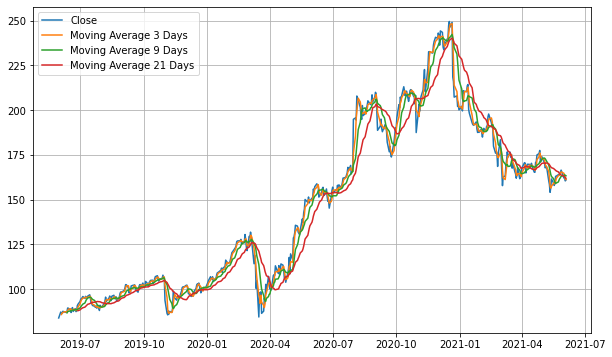

In [4]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'],label='Close')
plt.plot(knsl['3-day'],label='Moving Average 3 Days')
plt.plot(knsl['9-day'],label='Moving Average 9 Days')
plt.plot(knsl['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in on the changing period

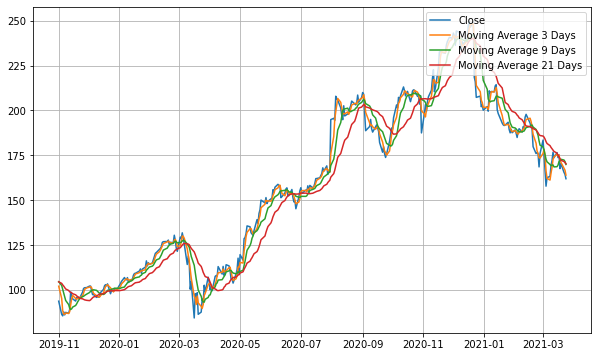

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-400:-50],label='Close')
plt.plot(knsl['3-day'][-400:-50],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][-400:-50],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][-400:-50],label='Moving Average 21 Days')
plt.legend(loc=1)

## Zoom in from the beginning to -200 days of the DataFrame

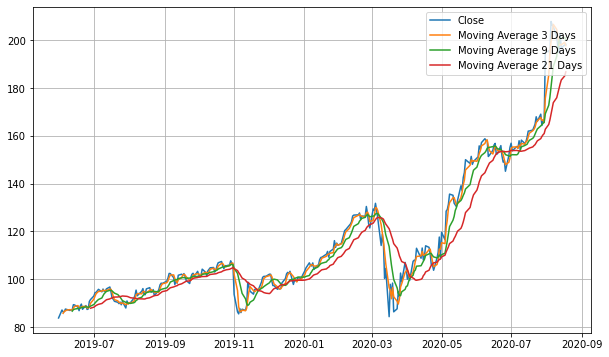

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][:-200],label='Close')
plt.plot(knsl['3-day'][:-200],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][:-200],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][:-200:],label='Moving Average 21 Days')
plt.legend(loc=1)

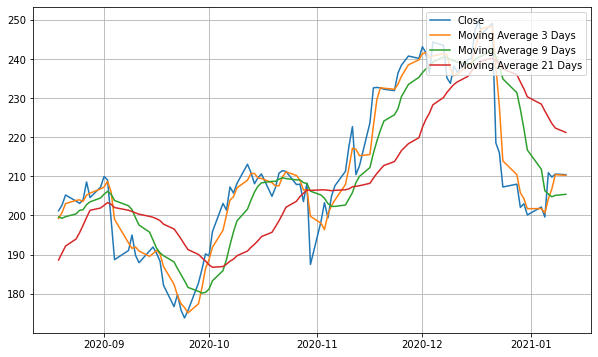

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-200:-100],label='Close')
plt.plot(knsl['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

In [8]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-9-21'] = np.where(knsl['9-day'] > knsl['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-9-21'] = np.where(knsl['9-day'] < knsl['21-day'],-1,knsl['position-9-21'])

<AxesSubplot:xlabel='Date'>

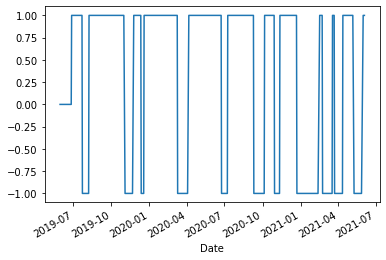

In [9]:
knsl['position-9-21'].plot()

<AxesSubplot:xlabel='Date'>

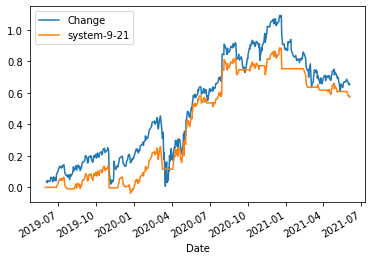

In [10]:
# Whether we are making money with this system
knsl['system-9-21'] = np.where(knsl['position-9-21'] > 0, knsl['position-9-21']* knsl['Change'],0)
knsl[['Change','system-9-21']].cumsum().plot()

In [11]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-3-9'] = np.where(knsl['3-day'] > knsl['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-3-9'] = np.where(knsl['3-day'] < knsl['9-day'],-1,knsl['position-3-9'])


<AxesSubplot:xlabel='Date'>

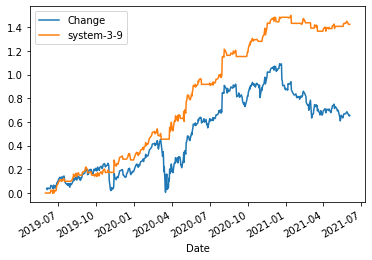

In [12]:
# Whether we are making money with this system
knsl['system-3-9'] = np.where(knsl['position-3-9'] > 0, knsl['position-3-9']* knsl['Change'],0)
knsl[['Change','system-3-9']].cumsum().plot()

<AxesSubplot:xlabel='Date'>

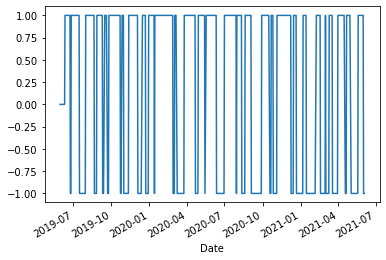

In [13]:
knsl['position-3-9'].plot()

In [14]:
knsl['position-3-9'].diff()[knsl['position-3-9'].diff() != 0].index.values

array(['2019-05-31T00:00:00.000000000', '2019-06-12T00:00:00.000000000',
       '2019-06-25T00:00:00.000000000', '2019-06-27T00:00:00.000000000',
       '2019-07-17T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-08-22T00:00:00.000000000', '2019-08-28T00:00:00.000000000',
       '2019-09-11T00:00:00.000000000', '2019-09-16T00:00:00.000000000',
       '2019-09-23T00:00:00.000000000', '2019-09-26T00:00:00.000000000',
       '2019-10-24T00:00:00.000000000', '2019-10-28T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000', '2019-12-16T00:00:00.000000000',
       '2019-12-24T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2020-02-28T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-26T00:00:00.000000000',
       '2020-04-22T00:00:00.000000000', '2020-04-29

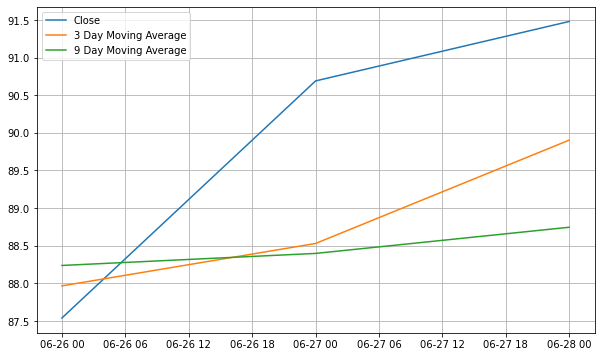

In [15]:
start = '2019-06-26'
finish = '2019-06-28'
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][start:finish],label='Close')
plt.plot(knsl['3-day'][start:finish],label='3 Day Moving Average')
plt.plot(knsl['9-day'][start:finish],label='9 Day Moving Average')
plt.legend(loc=2)

## Calculate the Volitility

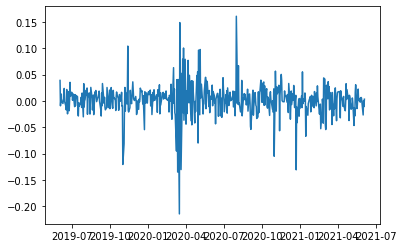

In [16]:
plt.plot(knsl.Change)

In [17]:
knsl['Volatility'] = knsl.Change.rolling(21).std().shift()

<AxesSubplot:xlabel='Date'>

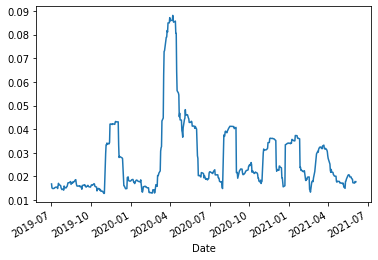

In [18]:
knsl.Volatility.plot()

## Prepare data for DGIM processing

In [19]:
bit_depth = 16
num_buckets = 5
knsl_list = knsl['Close'].tolist()
knsl_3day_list = knsl['3-day'].tolist()
knsl_9day_list = knsl['9-day'].tolist()
knsl_21day_list = knsl['21-day'].tolist()
knsl_list_bin = [ np.array(list(np.binary_repr(round(elem)).zfill(bit_depth))).astype(np.int8) for elem in knsl_list ]
print(knsl_list[0],knsl_list_bin[0], len(knsl_list_bin))

83.79000091552734 [0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0] 508


In [22]:
from ipynb.fs.full.DGIMMovingAverage import *

## 3, 9, 21 day moving average with DGIM

[0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0]
0 nan 28.0 nan
1 nan 57.0 nan
2 85.7433344523112 57.666666666666664 -32.74501506733476
3 86.6066665649414 57.666666666666664 -33.415441381263975
4 86.73999786376953 60.0 -30.827759421629608
5 87.08999888102214 60.333333333333336 -30.723005961043103
6 87.27999877929688 60.666666666666664 -30.491902480345804
7 87.14999898274739 58.0 -33.448077249568364
8 87.10999806722005 58.0 -33.41751660326841
9 87.90999857584636 60.666666666666664 -30.99002656185336
10 88.61666615804036 61.333333333333336 -30.788037970249857
11 88.98333231608073 59.333333333333336 -33.32084583821454
12 88.14999898274739 61.333333333333336 -30.42162899475765
13 87.98666636149089 61.333333333333336 -30.292468314065953
14 88.40333302815755 62.0 -29.86689768783691
15 88.59666697184245 62.0 -30.01994079562308
16 88.67666625976562 62.0 -30.083073016773255
17 87.93000030517578 60.666666666666664 -31.00572448980684
18 87.96666717529297 61.333333333333336 -30.27662033493533
19 88.5300013224283

322 191.586669921875 148.66666666666666 -22.40239536117529
323 191.95000203450522 148.66666666666666 -22.549275805716263
324 190.90999857584634 148.33333333333334 -22.301956712653674
325 189.55332946777344 127.0 -33.000385508083795
326 190.26666259765625 147.66666666666666 -22.389626931688426
327 191.06999715169272 148.33333333333334 -22.36701965533094
328 190.2066650390625 147.33333333333334 -22.540393995617514
329 186.94666544596353 126.66666666666667 -32.24448996482403
330 182.40333557128906 123.66666666666667 -32.20153223660004
331 179.55333455403647 121.0 -32.610552568944286
332 177.4366658528646 119.0 -32.933816453315174
333 176.46666463216147 123.33333333333333 -30.109557184402334
334 175.1000010172526 122.0 -30.325528674337733
335 177.42000325520834 124.33333333333333 -29.921468238005236
336 181.5800018310547 123.0 -32.26126293663031
337 186.40999857584634 127.0 -31.87060727950902
338 188.70332845052084 126.66666666666667 -32.87523452461018
339 191.90999348958334 148.0 -22.8805

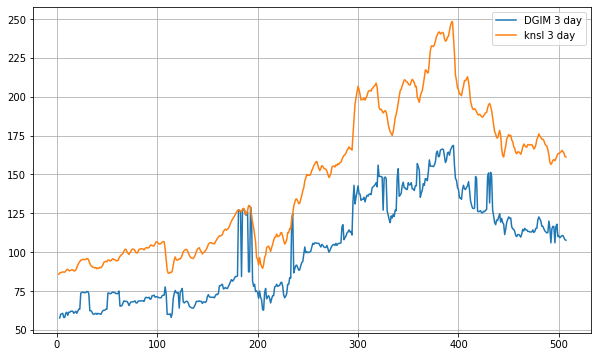

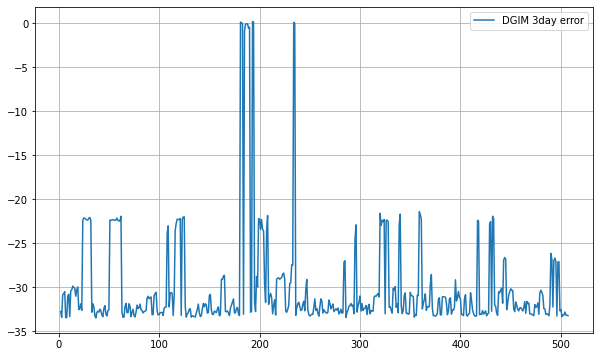

In [23]:
print(knsl_list_bin[0])
dgim_3day = DGIMMovingAverage(knsl_list_bin, 3, num_buckets, bit_depth, knsl_3day_list, False)
knsl['3-day-dgim'] = dgim_3day.mov_avg
knsl.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.mov_avg)), dgim_3day.mov_avg, label = "DGIM 3 day")
plt.plot(range(len(dgim_3day.mov_avg)), knsl_3day_list, label = "knsl 3 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.error)), dgim_3day.error, label = "DGIM 3day error")
plt.legend(loc=1)

0 nan 9.333333333333334 nan
1 nan 19.0 nan
2 nan 19.22222222222222 nan
3 nan 28.555555555555557 nan
4 nan 38.333333333333336 nan
5 nan 48.0 nan
6 nan 48.666666666666664 nan
7 nan 57.888888888888886 nan
8 86.64777713351779 67.33333333333333 -22.290755099720954
9 87.26555464002821 67.88888888888889 -22.204254394610082
10 87.5022210015191 67.88888888888889 -22.41466775145024
11 87.72777642144098 68.11111111111111 -22.360837251923645
12 87.77999877929688 68.11111111111111 -22.407026591147226
13 87.91777716742621 68.22222222222223 -22.402243982689363
14 88.16555447048611 68.55555555555556 -22.24224532211739
15 88.21888817681207 68.55555555555556 -22.289254634275625
16 88.42666625976562 68.77777777777777 -22.220546485679456
17 88.43888854980469 68.77777777777777 -22.23129563750079
18 88.23777770996094 68.77777777777777 -22.054045826208945
19 88.3977779812283 69.0 -21.94373933850183
20 88.7455563015408 69.22222222222223 -21.999224403959943
21 89.42888980441623 69.0 -22.843725164311945
22 90.0

186 127.10777791341145 98.66666666666667 -22.375586855211548
187 126.74666680230035 98.33333333333333 -22.417420659500408
188 126.14888932969835 97.66666666666667 -22.57825876579185
189 126.41888851589627 97.88888888888889 -22.567829825066006
190 126.54000006781683 98.0 -22.55413312195459
191 127.28555467393663 98.77777777777777 -22.396710270215912
192 127.5611106024848 99.55555555555556 -21.95461839008457
193 127.46888902452257 99.55555555555556 -21.898153880981123
194 125.65555487738715 97.77777777777777 -22.185869241365495
195 124.68555535210504 96.33333333333333 -22.738978816516976
196 123.75999959309895 96.33333333333333 -22.16117190525183
197 121.41444396972656 94.0 -22.57922786893631
198 118.65222252739801 91.33333333333333 -23.024338366486536
199 113.70777808295355 93.44444444444444 -17.820534338228246
200 109.94000074598524 86.11111111111111 -21.674449220653027
201 105.98333401150174 81.22222222222223 -23.36321273549701
202 102.96777852376302 79.0 -23.276969618443996
203 99.88

334 181.62000020345053 141.0 -22.365378349272135
335 180.60111151801215 140.0 -22.481097251698156
336 180.1500006781684 139.55555555555554 -22.53369135153843
337 180.3544447157118 139.77777777777777 -22.49829052003349
338 181.1866658528646 140.66666666666666 -22.363676154349474
339 183.31888665093317 142.77777777777777 -22.115074782420965
340 185.9066653781467 147.11111111111111 -20.86829656597993
341 188.7477773030599 146.22222222222223 -22.530360721841607
342 192.467776828342 149.88888888888889 -22.122605997277322
343 195.80555386013455 152.11111111111111 -22.315221344658447
344 198.63110860188803 155.11111111111111 -21.90996052788644
345 201.60999721950955 155.44444444444446 -22.898444229826968
346 203.92110866970486 157.77777777777777 -22.628030610929237
347 205.9722205268012 159.77777777777777 -22.427511161881462
348 207.49999830457898 161.33333333333334 -22.248995348655317
349 208.33777533637152 162.22222222222223 -22.13499354099058
350 208.7288852267795 162.66666666666666 -22.06

497 158.98110961914062 123.44444444444444 -22.352759557301344
498 159.25999959309897 123.66666666666667 -22.349198177427738
499 159.85666741265192 124.22222222222223 -22.2914976066925
500 160.91000027126736 125.55555555555556 -21.971564636200437
501 161.78222147623697 126.33333333333333 -21.911485588118516
502 162.23111131456164 126.33333333333333 -22.127554752197632
503 163.03888956705728 126.22222222222223 -22.58152483901241
504 163.50333489312067 127.11111111111111 -22.257786855417063
505 163.81777954101562 127.55555555555556 -22.135707178463477
506 163.53444586859808 127.22222222222223 -22.204633068896793
507 163.2955559624566 127.0 -22.22690981915107


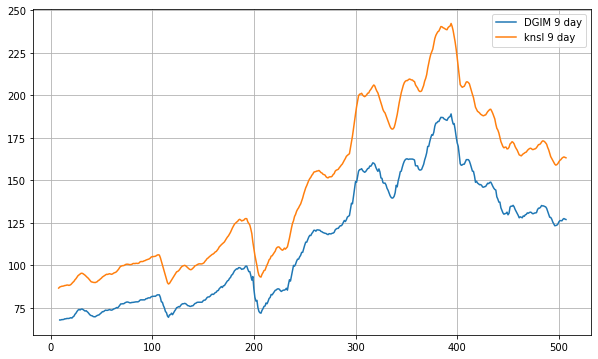

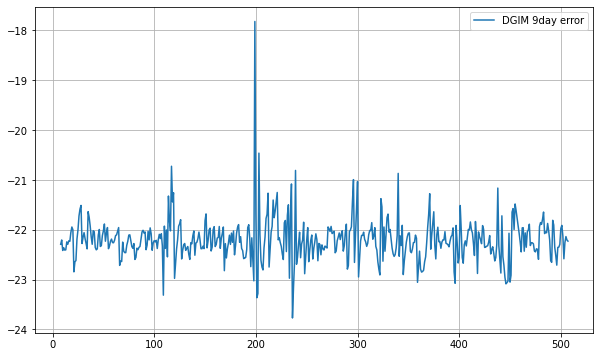

In [24]:
dgim_9day = DGIMMovingAverage(knsl_list_bin, 9, num_buckets, bit_depth, knsl_9day_list, False)
knsl['9-day-dgim'] = dgim_9day.mov_avg
knsl.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.mov_avg)), dgim_9day.mov_avg, label = "DGIM 9 day")
plt.plot(range(len(dgim_9day.mov_avg)), knsl_9day_list, label = "knsl 9 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.error)), dgim_9day.error, label = "DGIM 9day error")
plt.legend(loc=1)

0 nan 4.0 nan
1 nan 8.142857142857142 nan
2 nan 8.238095238095237 nan
3 nan 12.238095238095237 nan
4 nan 16.428571428571427 nan
5 nan 20.571428571428573 nan
6 nan 20.857142857142858 nan
7 nan 24.80952380952381 nan
8 nan 28.857142857142858 nan
9 nan 33.095238095238095 nan
10 nan 36.904761904761905 nan
11 nan 41.095238095238095 nan
12 nan 45.23809523809524 nan
13 nan 49.476190476190474 nan
14 nan 46.142857142857146 nan
15 nan 50.285714285714285 nan
16 nan 54.142857142857146 nan
17 nan 58.285714285714285 nan
18 nan 62.476190476190474 nan
19 nan 66.80952380952381 nan
20 87.88047608875092 71.14285714285714 -19.045890157661848
21 88.31904747372582 71.47619047619048 -19.070469484564978
22 88.66571408226376 71.9047619047619 -18.90353261233661
23 89.0566664196196 72.23809523809524 -18.88524672850224
24 89.50428553989956 72.71428571428571 -18.75887810771825
25 89.8480951218378 73.04761904761905 -18.69875599636987
26 90.2538092476981 73.47619047619048 -18.589374688288324
27 90.63619050525483 73.8

190 124.18714250837054 95.23809523809524 -23.31082484511153
191 124.98761821928478 96.04761904761905 -23.15429286834788
192 125.56714230492001 101.19047619047619 -19.41325227840969
193 125.9066663469587 101.57142857142857 -19.32799785872335
194 125.60999952043805 101.28571428571429 -19.364927416281017
195 125.51714252290272 101.19047619047619 -19.381150529289428
196 125.153809320359 100.80952380952381 -19.451493840287817
197 124.07095227922711 99.71428571428571 -19.63124012309155
198 123.13952382405598 98.80952380952381 -19.758075440745838
199 121.13285718645368 96.80952380952381 -20.079880836534873
200 119.75333331880115 95.42857142857143 -20.312388153299747
201 118.1500000726609 93.80952380952381 -20.601334107632653
202 116.75333368210565 92.38095238095238 -20.875105260389436
203 114.91000039236886 90.52380952380952 -21.22199180688439
204 113.06190527053107 88.71428571428571 -21.534768495177154
205 111.56142934163411 87.23809523809524 -21.802637566657218
206 109.76666695731026 85.476

349 194.6123795282273 156.66666666666666 -19.498098195781456
350 195.6952362060547 159.28571428571428 -18.605216266993587
351 197.14428347632997 160.71428571428572 -18.478850677107356
352 198.62095060802642 162.1904761904762 -18.341707813817113
353 200.3190460205078 159.28571428571428 -20.48398919121885
354 202.1028551374163 161.04761904761904 -20.31403072553452
355 203.63666425432478 162.57142857142858 -20.16593418148376
356 204.83809262230284 163.76190476190476 -20.053002512641875
357 205.6604737781343 166.14285714285714 -19.214978896678325
358 206.52142624627976 167.0 -19.136719595936693
359 206.41761707124255 166.85714285714286 -19.165260589383642
360 206.53666469029017 166.95238095238096 -19.165741732717237
361 206.54571242559524 166.95238095238096 -19.169282677546324
362 206.45095025925409 166.85714285714286 -19.17831201667547
363 206.33523632231214 166.76190476190476 -19.17914373994303
364 206.42476036435082 167.23809523809524 -18.9835100484501
365 206.57142711821058 167.3809523

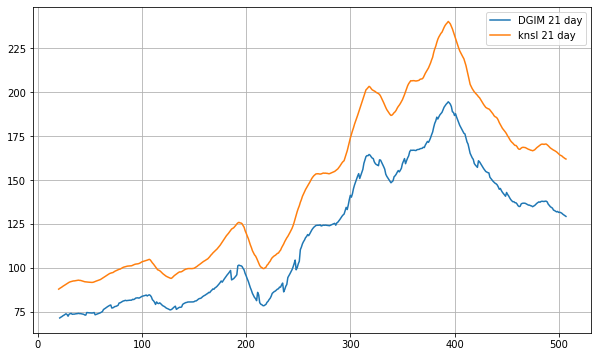

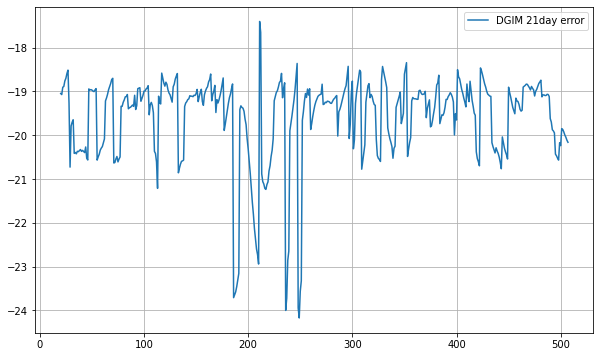

In [25]:
dgim_21day = DGIMMovingAverage(knsl_list_bin, 21, num_buckets, bit_depth, knsl_21day_list, False)
knsl['21-day-dgim'] = dgim_21day.mov_avg
knsl.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.mov_avg, label = "DGIM 21 day")
plt.plot(range(len(dgim_21day.mov_avg)), knsl_21day_list, label = "knsl 21 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.error, label = "DGIM 21day error")
plt.legend(loc=1)

In [26]:
knsl.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2021-05-28  166.770004  165.190002  165.470001  166.460007   65200.0   
2021-06-01  167.000000  162.009995  167.000000  162.080002   75500.0   
2021-06-02  162.535004  160.000000  162.279999  162.199997  129400.0   
2021-06-03  162.199997  160.000000  161.330002  160.449997   96100.0   
2021-06-04  161.589996  159.684998  160.500000  160.979996   77100.0   

                 3-day       9-day      21-day    Change  position-9-21  \
Date                                                                      
2021-05-28  165.503337  163.038890  163.712381  0.005361             -1   
2021-06-01  164.703339  163.503335  163.144286 -0.026665              1   
2021-06-02  163.580002  163.817780  162.711905  0.000740              1   
2021-06-03  161.576665  163.534446  162.252858 -0.010848              1   
2021-06-04  161.209997  163.295556  161.932381  0.003298              1   

            system-9-21  position-3-9  system-3-9  Volatility  3-day-dgim  \
Date                                                                        
2021-05-28     0.000000             1    0.005361    0.017359  110.666667   
2021-06-01    -0.026665             1   -0.026665    0.017207  110.666667   
2021-06-02     0.000740            -1    0.000000    0.017907  109.333333   
2021-06-03    -0.010848            -1    0.000000    0.017695  108.000000   
2021-06-04     0.003298            -1    0.000000    0.017763  107.666667   

            9-day-dgim  21-day-dgim  
Date                                 
2021-05-28  126.222222   131.095238  
2021-06-01  127.111111   130.523810  
2021-06-02  127.555556   130.095238  
2021-06-03  127.222222   129.619048  
2021-06-04  127.000000   129.285714

## 9/21 DGIM Comparison

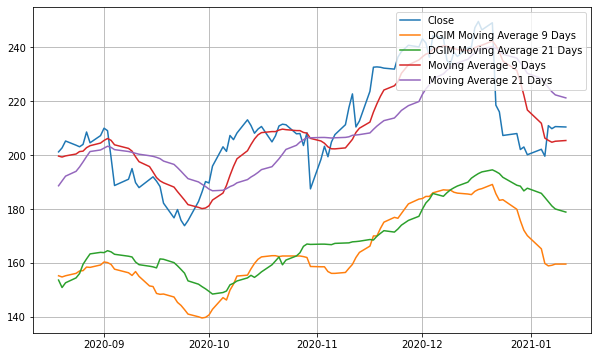

In [27]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-200:-100],label='Close')
plt.plot(knsl['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(knsl['21-day-dgim'][-200:-100],label='DGIM Moving Average 21 Days')
plt.plot(knsl['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(knsl['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

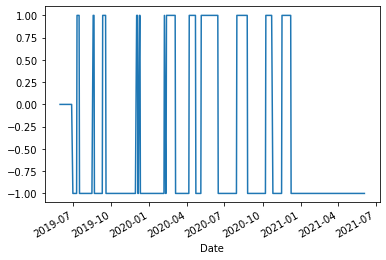

In [28]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-dgim-9-21'] = np.where(knsl['9-day-dgim'] > knsl['21-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-dgim-9-21'] = np.where(knsl['9-day-dgim'] < knsl['21-day-dgim'],-1,knsl['position-dgim-9-21'])
knsl['position-dgim-9-21'].plot()

Change  system-dgim-9-21
Date                                  
2021-05-28  0.686441          0.515107
2021-06-01  0.659776          0.515107
2021-06-02  0.660516          0.515107
2021-06-03  0.649669          0.515107
2021-06-04  0.652966          0.515107

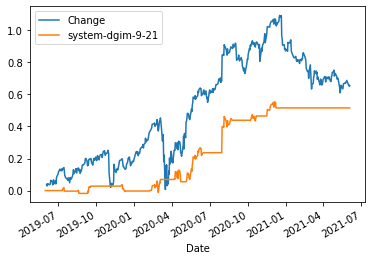

In [29]:
# Whether we are making money with this system
knsl['system-dgim-9-21'] = np.where(knsl['position-dgim-9-21'] > 0, knsl['position-dgim-9-21']* knsl['Change'],0)
knsl[['Change','system-dgim-9-21']].cumsum().plot()
knsl[['Change','system-dgim-9-21']].cumsum().tail()

system-9-21  system-dgim-9-21
Date                                     
2021-05-28     0.608392          0.515107
2021-06-01     0.581727          0.515107
2021-06-02     0.582467          0.515107
2021-06-03     0.571620          0.515107
2021-06-04     0.574917          0.515107

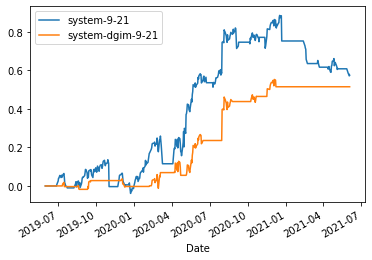

In [30]:
knsl[['system-9-21','system-dgim-9-21']].cumsum().plot()
knsl[['system-9-21','system-dgim-9-21']].cumsum().tail()

## 3/9 DGIM comparison

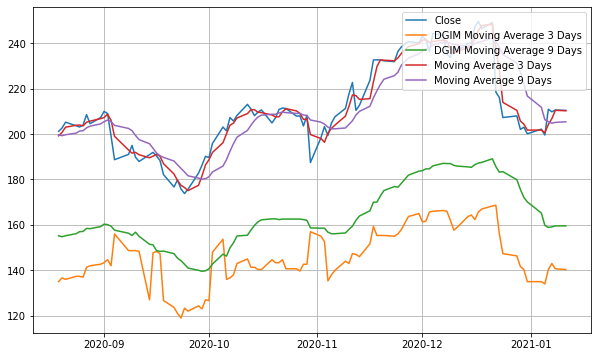

In [31]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(knsl['Close'][-200:-100],label='Close')
plt.plot(knsl['3-day-dgim'][-200:-100],label='DGIM Moving Average 3 Days')
plt.plot(knsl['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(knsl['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(knsl['9-day'][-200:-100],label='Moving Average 9 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

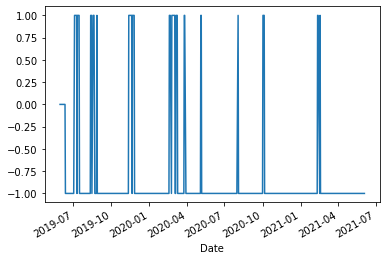

In [32]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-dgim-3-9'] = np.where(knsl['3-day-dgim'] > knsl['9-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-dgim-3-9'] = np.where(knsl['3-day-dgim'] < knsl['9-day-dgim'],-1,knsl['position-dgim-3-9'])
knsl['position-dgim-3-9'].plot()

Change  system-dgim-3-9
Date                                 
2021-05-28  0.686441         0.274546
2021-06-01  0.659776         0.274546
2021-06-02  0.660516         0.274546
2021-06-03  0.649669         0.274546
2021-06-04  0.652966         0.274546

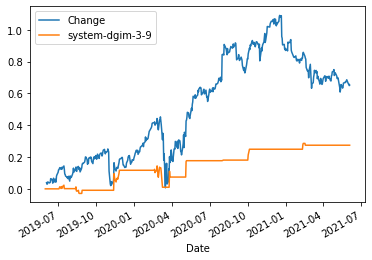

In [33]:
# Whether we are making money with this system
knsl['system-dgim-3-9'] = np.where(knsl['position-dgim-3-9'] > 0, knsl['position-dgim-3-9']* knsl['Change'],0)
knsl[['Change','system-dgim-3-9']].cumsum().plot()
knsl[['Change','system-dgim-3-9']].cumsum().tail()

system-3-9  system-dgim-3-9
Date                                   
2021-05-28    1.450044         0.274546
2021-06-01    1.423379         0.274546
2021-06-02    1.423379         0.274546
2021-06-03    1.423379         0.274546
2021-06-04    1.423379         0.274546

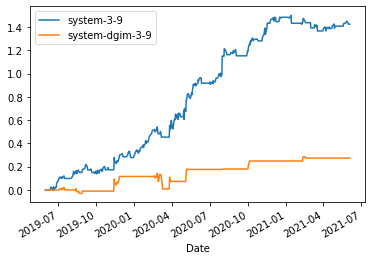

In [34]:
knsl[['system-3-9','system-dgim-3-9']].cumsum().plot()
knsl[['system-3-9','system-dgim-3-9']].cumsum().tail()

## Pandas 9/21 vs DGIM 3/9

system-9-21  system-dgim-3-9
Date                                    
2021-05-28     0.608392         0.274546
2021-06-01     0.581727         0.274546
2021-06-02     0.582467         0.274546
2021-06-03     0.571620         0.274546
2021-06-04     0.574917         0.274546

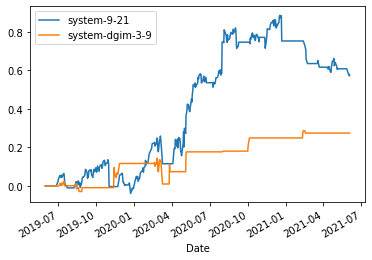

In [35]:
knsl[['system-9-21','system-dgim-3-9']].cumsum().plot()
knsl[['system-9-21','system-dgim-3-9']].cumsum().tail()

## Normalizing DGIM

<AxesSubplot:xlabel='Date'>

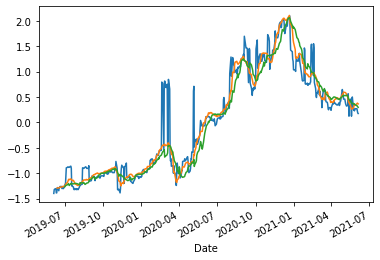

In [36]:
from sklearn import preprocessing

df3 = knsl['3-day-dgim']
df9 = knsl['9-day-dgim']
df21 = knsl['21-day-dgim']

knsl['3-day-dgim-norm']=(df3-df3.mean())/df3.std()
knsl['9-day-dgim-norm']=(df9-df9.mean())/df9.std()
knsl['21-day-dgim-norm']=(df21-df21.mean())/df21.std()

knsl['3-day-dgim-norm'].plot()
knsl['9-day-dgim-norm'].plot()
knsl['21-day-dgim-norm'].plot()

<AxesSubplot:xlabel='Date'>

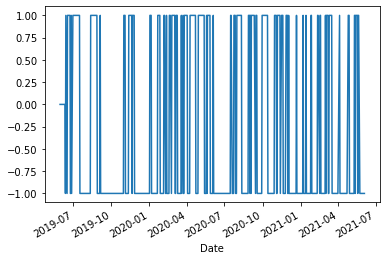

In [37]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-dgim-3-9-norm'] = np.where(knsl['3-day-dgim-norm'] > knsl['9-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-dgim-3-9-norm'] = np.where(knsl['3-day-dgim-norm'] < knsl['9-day-dgim-norm'],-1,knsl['position-dgim-3-9-norm'])
knsl['position-dgim-3-9-norm'].plot()

Change  system-dgim-3-9-norm
Date                                      
2021-05-28  0.686441               0.37916
2021-06-01  0.659776               0.37916
2021-06-02  0.660516               0.37916
2021-06-03  0.649669               0.37916
2021-06-04  0.652966               0.37916

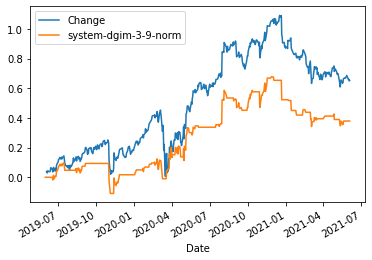

In [38]:
# Whether we are making money with this system
knsl['system-dgim-3-9-norm'] = np.where(knsl['position-dgim-3-9-norm'] > 0, knsl['position-dgim-3-9-norm']* knsl['Change'],0)
knsl[['Change','system-dgim-3-9-norm']].cumsum().plot()
knsl[['Change','system-dgim-3-9-norm']].cumsum().tail()

system-dgim-3-9-norm  system-dgim-3-9
Date                                             
2021-05-28               0.37916         0.274546
2021-06-01               0.37916         0.274546
2021-06-02               0.37916         0.274546
2021-06-03               0.37916         0.274546
2021-06-04               0.37916         0.274546

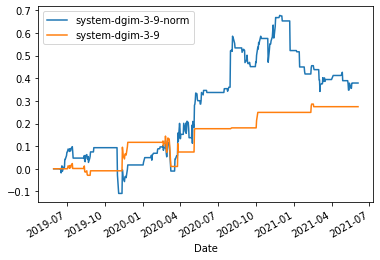

In [39]:
knsl[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().plot()
knsl[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().tail()

system-dgim-3-9-norm  system-3-9
Date                                        
2021-05-28               0.37916    1.450044
2021-06-01               0.37916    1.423379
2021-06-02               0.37916    1.423379
2021-06-03               0.37916    1.423379
2021-06-04               0.37916    1.423379

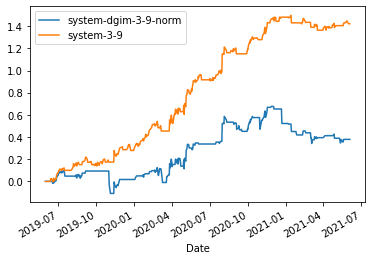

In [40]:
knsl[['system-dgim-3-9-norm','system-3-9']].cumsum().plot()
knsl[['system-dgim-3-9-norm','system-3-9']].cumsum().tail()

<AxesSubplot:xlabel='Date'>

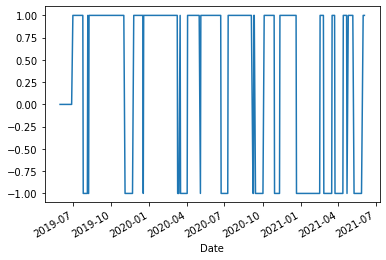

In [41]:
# When the faster moving average is moving above the slower one, indicates time to buy
knsl['position-dgim-9-21-norm'] = np.where(knsl['9-day-dgim-norm'] > knsl['21-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
knsl['position-dgim-9-21-norm'] = np.where(knsl['9-day-dgim-norm'] < knsl['21-day-dgim-norm'],-1,knsl['position-dgim-9-21-norm'])
knsl['position-dgim-9-21-norm'].plot()

Change  system-dgim-9-21-norm
Date                                       
2021-05-28  0.686441               0.508255
2021-06-01  0.659776               0.481590
2021-06-02  0.660516               0.482330
2021-06-03  0.649669               0.471482
2021-06-04  0.652966               0.474780

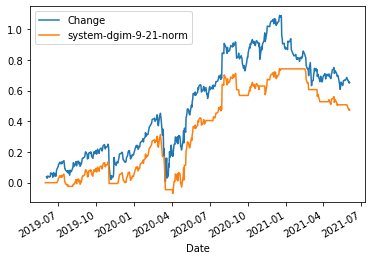

In [42]:
# Whether we are making money with this system
knsl['system-dgim-9-21-norm'] = np.where(knsl['position-dgim-9-21-norm'] > 0, knsl['position-dgim-9-21-norm']* knsl['Change'],0)
knsl[['Change','system-dgim-9-21-norm']].cumsum().plot()
knsl[['Change','system-dgim-9-21-norm']].cumsum().tail()

system-dgim-9-21-norm  system-dgim-9-21
Date                                               
2021-05-28               0.508255          0.515107
2021-06-01               0.481590          0.515107
2021-06-02               0.482330          0.515107
2021-06-03               0.471482          0.515107
2021-06-04               0.474780          0.515107

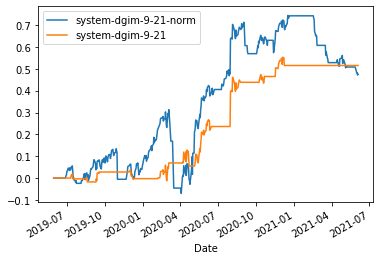

In [43]:
knsl[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().plot()
knsl[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().tail()

system-dgim-9-21-norm  system-9-21
Date                                          
2021-05-28               0.508255     0.608392
2021-06-01               0.481590     0.581727
2021-06-02               0.482330     0.582467
2021-06-03               0.471482     0.571620
2021-06-04               0.474780     0.574917

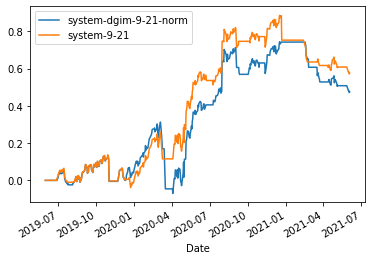

In [44]:
knsl[['system-dgim-9-21-norm','system-9-21']].cumsum().plot()
knsl[['system-dgim-9-21-norm','system-9-21']].cumsum().tail()

system-dgim-3-9-norm  system-dgim-9-21-norm
Date                                                   
2021-05-28               0.37916               0.508255
2021-06-01               0.37916               0.481590
2021-06-02               0.37916               0.482330
2021-06-03               0.37916               0.471482
2021-06-04               0.37916               0.474780

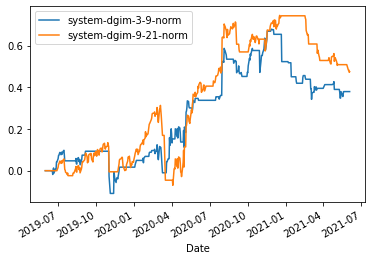

In [45]:
knsl[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().plot()
knsl[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().tail()